In [2]:
import numpy as np
import pandas as pd
import os
from termcolor import colored

import matplotlib.pyplot as plt
import matplotlib.patches as mpatces
import seaborn as sns
from matplotlib.gridspec import GridSpec
%matplotlib inline

from scipy.stats import binned_statistic
from itertools import compress
from scipy import stats

In [3]:
df = pd.read_csv('train.csv')

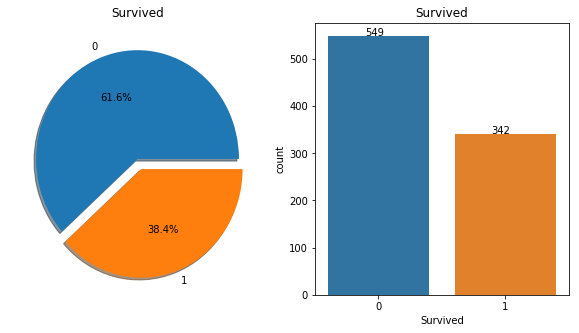

In [5]:
f, ax = plt.subplots(1,2,figsize = (10,5))
df['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = df, ax = ax[1])
for p in ax[1].patches:
    ax[1].annotate(np.round(p.get_height(),decimals = 2), (p.get_x()+0.292, p.get_height()+0.2))
ax[1].set_title('Survived')
plt.show()

In [10]:
col_names = ['Age', 'SibSp']

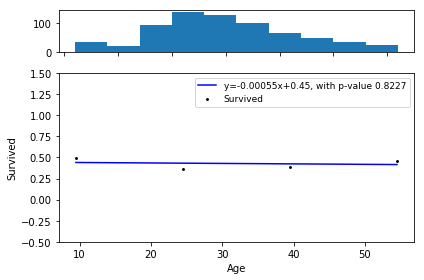

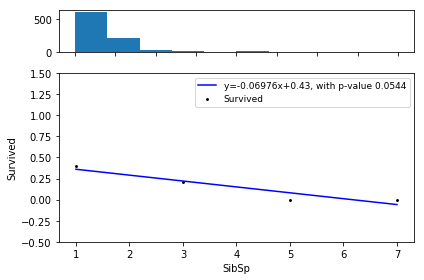

In [22]:
for i in np.arange(len(col_names)):
    df_feature = pd.DataFrame({col_names[i]:df[col_names[i]],
                               'Survived':df['Survived']})
    df_feature = df_feature[[col_names[i], 'Survived']]
    df_feature = df_feature.dropna() # drop all nas
    if len(set(df_feature[col_names[i]])) > 20:
        min_num = np.percentile(df_feature.iloc[:,0],2.5)
        max_num = np.percentile(df_feature.iloc[:,0],97.5)
        sub_filter = ((min_num <= df_feature.iloc[:,0]) & (0 < df_feature.iloc[:,0]) &
                      (df_feature.iloc[:,0] <= max_num)).tolist() ## get rid of special values
        df_feature = df_feature.iloc[sub_filter,:]
    else:
        min_num = np.percentile(df_feature.iloc[:,0], 0)
        max_num = np.percentile(df_feature.iloc[:,0],100)
    bins = list(np.linspace(min_num, max_num, 5)) # create boundary of the interval
    # could only set 5 bins beacause the 'SibSp' has very few categories
    bins[0] = bins[0] - 10**-10 # lower bound issue
    labels = []
    for j in np.arange(len(bins) - 1):
        labels.append((bins[j] + bins[j+1])/2)
    df_feature['Binned'] = pd.cut(df_feature.iloc[:,0], bins, labels = labels)
    df_plot = df_feature[['Survived','Binned']].groupby(['Binned']).mean().reset_index()
    df_plot.iloc[:,0] = pd.to_numeric(df_plot.iloc[:,0])
    x = df_plot.iloc[:,0]
    y = df_plot.iloc[:,1]
    ## start to plot
    fig = plt.figure()
    gs = GridSpec(4,4)
    ax_joint = fig.add_subplot(gs[1:4,0:4])
    ax_marg_x = fig.add_subplot(gs[0,0:4])
    # regression part
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    line = slope*x + intercept
    ax_joint.set_ylim(-0.5,1.5)
    ax_joint.plot(x, line,'b',label = 'y={:.5f}x+{:.2f}, with p-value {:.4f}'.format(slope,intercept,p_value))
    ax_joint.scatter(x,y,color='k', s=3.5)
    ax_joint.legend(fontsize=9)
    ax_marg_x.hist(df_feature.iloc[:,0])
    # turn off tick labels on marginals
    plt.setp(ax_marg_x.get_xticklabels(), visible = False)
    # set labels on joint
    ax_joint.set_xlabel(col_names[i])
    ax_joint.set_ylabel('Survived')
    fig.tight_layout()
    plt.show()       